<a href="https://colab.research.google.com/github/HamzaB505/Brain-Tumor-Classification-DataSet/blob/master/Brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplcyberpunk

In [4]:
#Make directory name kaggle
! mkdir ~/.kaggle

kaggle/  sample_data/


# Load dataset from kaggle into collab

In [5]:
#Allocate the required permission for this file.
! chmod 600 ./kaggle/kaggle.json

chmod: cannot access './kaggle/kaggle.json': No such file or directory


In [1]:
#Downloading dataset not part from any competition
! kaggle datasets download sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 99% 86.0M/86.8M [00:00<00:00, 104MB/s]
100% 86.8M/86.8M [00:00<00:00, 99.4MB/s]


In [7]:
ls

brain-tumor-classification-mri.zip  sample_data/


In [2]:
# Put on the same directory
from zipfile import ZipFile

# specifying the name of the zip file
file = "brain-tumor-classification-mri.zip"

# open the zip file in read mode
with ZipFile(file, 'r') as zip:
    # list all the contents of the zip file
    zip.printdir()

    # extract all files
    print('extraction...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
Testing/glioma_tumor/image(1).jpg              2020-05-24 16:25:06        49523
Testing/glioma_tumor/image(10).jpg             2020-05-24 16:25:06        33849
Testing/glioma_tumor/image(100).jpg            2020-05-24 16:25:06        28189
Testing/glioma_tumor/image(11).jpg             2020-05-24 16:25:06        47089
Testing/glioma_tumor/image(12).jpg             2020-05-24 16:25:06        47089
Testing/glioma_tumor/image(13).jpg             2020-05-24 16:25:06        29707
Testing/glioma_tumor/image(14).jpg             2020-05-24 16:25:06        44484
Testing/glioma_tumor/image(15).jpg             2020-05-24 16:25:06        28524
Testing/glioma_tumor/image(16).jpg             2020-05-24 16:25:06        39926
Testing/glioma_tumor/image(17).jpg             2020-05-24 16:25:06        36993
Testing/glioma_tumor/image(18).jpg             2020-05-24 16:25:06        51382
Testing/glioma_tumor/image(19).jpg      

# Check GPU info

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jun  2 00:46:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [5]:
import os
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import time
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import io
from PIL import Image
from warnings import filterwarnings

Data loading

In [ ]:
ls

brain-tumor-classification-mri.zip  kaggle/  sample_data/  Testing/  Training/


In [6]:
X_train = []
y_train = []
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


image_size = 256
for i in labels:
    folderPath = os.path.join('./Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('./Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 107.91it/s]


In [7]:
X_train.shape

(3264, 256, 256, 3)

In [8]:
for i in range(0, 10):
  print(X_train[i].shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
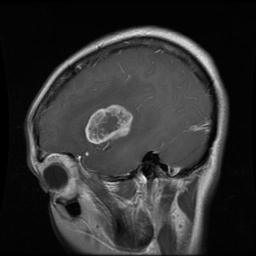

In [9]:
X_train[1]

In [10]:
y_train[1]

'glioma_tumor'

**Glioma Tumor:**

Originating in the brain or spine's glial cells, gliomas represent 30% of all brain and central nervous system tumors. They are mostly malignant, with symptoms that vary depending on location, frequently resulting in seizures, cognitive impairments, or motor deficits.

**Meningioma Tumor:**

Meningiomas, arising from the meninges enveloping the brain and spinal cord, are slow-growing tumors. While they typically are asymptomatic, they can cause seizures, cognitive decline, vision disturbances, or motor deficits depending on their location.

**Pituitary Tumor:**

Pituitary adenomas, mostly benign, occur in the pituitary gland, accounting for 10-25% of intracranial neoplasms. They may cause hormonal imbalances, resulting in a variety of symptoms including headaches, vision changes, or hormonal dysfunctions.

# Modeling

In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

classes = ["Glioma", "menin", "no", "pit"]
# image_1_name = "Glioma"
# image_1_name = 3
# image_1_name = [0,0,1,0]
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_dir = "./Training"
train_dataset = image_dataset_from_directory(train_dir,
                                             label_mode='categorical',
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.


In [12]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [13]:
validation_dataset = image_dataset_from_directory(train_dir,
                                             label_mode='categorical',
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 2870 files belonging to 4 classes.
Using 574 files for validation.


In [14]:
test_dir = "./Testing"
test_dataset = image_dataset_from_directory(test_dir,
                                             label_mode='categorical',
                                             shuffle=True,
                                             image_size=IMG_SIZE,
                                             seed=42)

Found 394 files belonging to 4 classes.


In [15]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


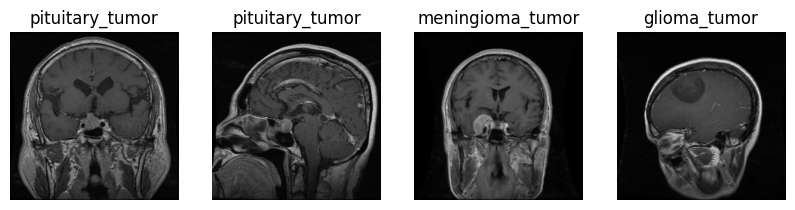

In [16]:
class_names = train_dataset.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(2):
    for i in range(4):
        ax = plt.subplot(1, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

In [17]:
train_dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
# helps define the optimal batch size depending on the compute configs
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [19]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

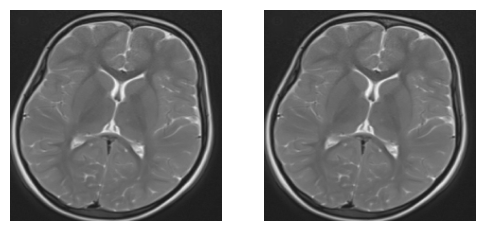

In [20]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(6, 6))
    first_image = image[0]
    ax = plt.subplot(1, 2, 1)
    ax.imshow(first_image/255)
    plt.axis('off')

    ax = plt.subplot(1, 2, 2)
    augmented_image = preprocess_input(tf.expand_dims(first_image, 0))
    ax.imshow(augmented_image[0]/255)
    plt.axis('off')

In [35]:

tf.keras.preprocessing.image.ImageDataGenerator

keras.src.preprocessing.image.ImageDataGenerator

In [21]:
# Define data augmentation and preprocessing pipelines
augmentation_list = [
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomRotation(factor=0.9),
    tf.keras.layers.RandomContrast(factor=0.9)
]
data_augmentation = tf.keras.Sequential(augmentation_list)

# plt.imshow(data_augmentation(train_generator[0][0][0]))

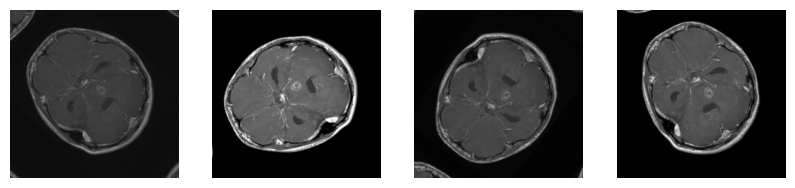

In [23]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(4):
        ax = plt.subplot(1, 4, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [24]:
print((*IMG_SIZE,3))

(224, 224, 3)


In [25]:
import tensorflow as tf

# Load EfficientNetB3 model with pretrained weights
base_model = tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(*IMG_SIZE, 3))

# INPUT
# Define input layer with variable input size
inputs = base_model.input
# Preprocessing & Augmentation
# Apply data augmentation and preprocessing to input images
augmented_inputs = data_augmentation(inputs)
# Use EfficientNetB3 base model Preprocessing Layer
effecent_preproceess_input = preprocess_input(augmented_inputs)
# set training to False to avoid keeping track of statistics in the batch norm layer
x = base_model(effecent_preproceess_input, training=False)


# Add GlobalAveragePooling2D layer to reduce dimensions by replace the Fully Connected
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# include dropout with probability of 0.5 to avoid overfitting
x = tf.keras.layers.Dropout(0.5, seed=42)(x)
# Add output layer with softmax activation for classification
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the final model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

258076736/258076736 [==============================] - 1s 0us/step


In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb7 (Functional  (None, 7, 7, 2560)        64097687  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 2560)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 4)                 10244 

In [29]:
base_model.trainable = False

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb7 (Functional  (None, 7, 7, 2560)        64097687  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 2560)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 4)                 10244 

In [31]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb7 (Functional  (None, 7, 7, 2560)        64097687  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 2560)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 4)                 10244 

In [33]:

checkpoint = tf.keras.callbacks.ModelCheckpoint("./effnet.keras",monitor="val_accuracy",save_best_only=True,mode="auto")
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.0001,
                              mode='auto')

callbacks=[checkpoint, reduce_lr]

In [34]:
callbacks

In [35]:
initial_epochs = 5
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs, callbacks = callbacks)

Epoch 1/5
72/72 [==============================] - 76s 671ms/step - loss: 1.0233 - accuracy: 0.5771 - val_loss: 0.7588 - val_accuracy: 0.7247 - lr: 0.0010
Epoch 2/5
72/72 [==============================] - 37s 506ms/step - loss: 0.7570 - accuracy: 0.7008 - val_loss: 0.6963 - val_accuracy: 0.7387 - lr: 0.0010
Epoch 3/5
72/72 [==============================] - 36s 498ms/step - loss: 0.6624 - accuracy: 0.7517 - val_loss: 0.6236 - val_accuracy: 0.7613 - lr: 0.0010
Epoch 4/5
72/72 [==============================] - 33s 456ms/step - loss: 0.6052 - accuracy: 0.7705 - val_loss: 0.6157 - val_accuracy: 0.7526 - lr: 0.0010
Epoch 5/5
72/72 [==============================] - 37s 509ms/step - loss: 0.5640 - accuracy: 0.7883 - val_loss: 0.5708 - val_accuracy: 0.7753 - lr: 0.0010


## Fine tuning

In [36]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  814


In [37]:
# We unfreeze the top 20 layers while leaving BatchNorm layers frozen
for layer in base_model.layers[200:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

optimizer = tf.keras.optimizers.Adam(0.001)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb7 (Functional  (None, 7, 7, 2560)        64097687  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 2560)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 4)                 10244 

In [39]:
fine_tune_epochs = 30
# total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=fine_tune_epochs,
                         validation_data=validation_dataset,
                         callbacks = callbacks)

Epoch 1/30
72/72 [==============================] - 64s 575ms/step - loss: 0.5608 - accuracy: 0.7827 - val_loss: 0.6025 - val_accuracy: 0.7718 - lr: 0.0010
Epoch 2/30
72/72 [==============================] - 38s 521ms/step - loss: 0.5187 - accuracy: 0.7970 - val_loss: 0.5773 - val_accuracy: 0.7822 - lr: 0.0010
Epoch 3/30
72/72 [==============================] - 37s 511ms/step - loss: 0.4955 - accuracy: 0.8132 - val_loss: 0.5474 - val_accuracy: 0.7979 - lr: 0.0010
Epoch 4/30
72/72 [==============================] - 33s 451ms/step - loss: 0.5084 - accuracy: 0.8044 - val_loss: 0.5661 - val_accuracy: 0.7787 - lr: 0.0010
Epoch 5/30
72/72 [==============================] - 36s 504ms/step - loss: 0.4926 - accuracy: 0.8158 - val_loss: 0.5145 - val_accuracy: 0.8049 - lr: 0.0010
Epoch 6/30
72/72 [==============================] - 33s 451ms/step - loss: 0.5133 - accuracy: 0.8075 - val_loss: 0.5274 - val_accuracy: 0.8014 - lr: 0.0010
Epoch 7/30
72/72 [==============================] - 33s 453ms/st

In [40]:
best_model = tf.keras.models.load_model("./effnet.keras")


In [41]:
best_model.save("best_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


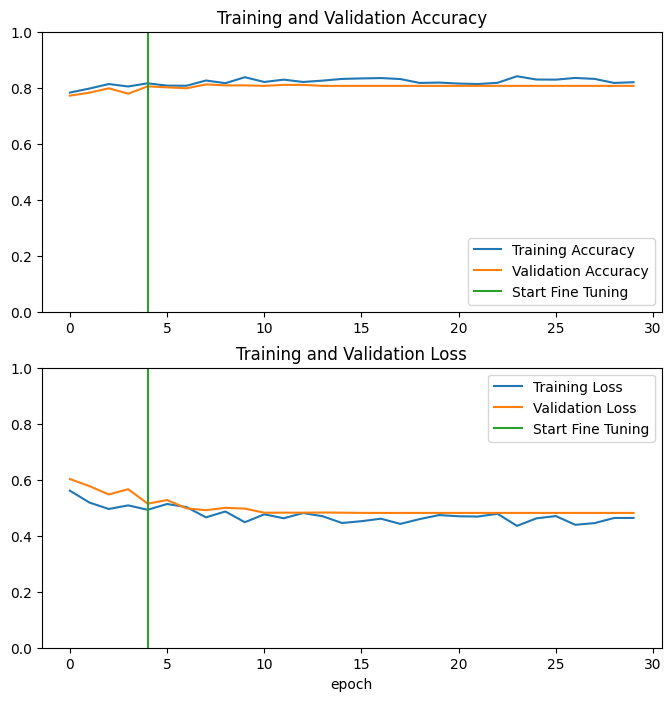

In [42]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [43]:
tf.config.run_functions_eagerly(True)

model.evaluate(test_dataset)

13/13 [==============================] - 8s 556ms/step - loss: 1.0136 - accuracy: 0.6269


[1.0136388540267944, 0.6269035339355469]